In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats

In [4]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(ratings_url)

In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


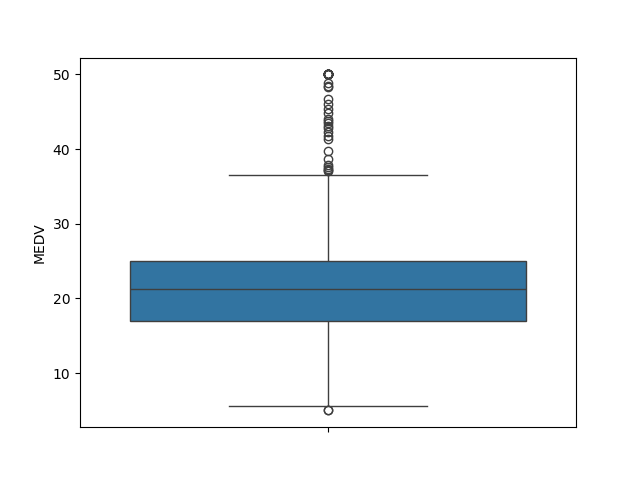

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.show()

In [8]:
#From the above box plot we could find the following facts:

#Median value of MEDV lies around 22
#Min value is almost around 5 amd the max value is around 50
#MEDV attribute have a few outliers#

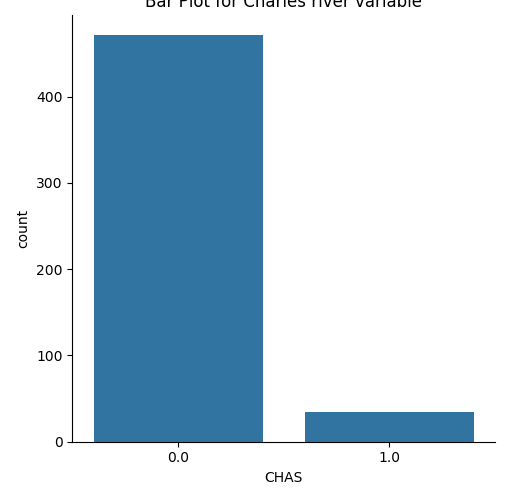

In [13]:
ax=sns.catplot(x='CHAS', data=boston_df,kind='count')
pyplot.title("Bar Plot for Charles river variable")
pyplot.show()

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '57 years and older'

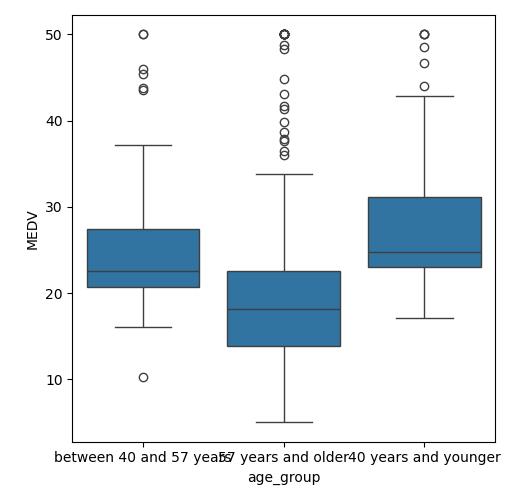

In [15]:
ax=sns.boxplot(x='age_group',y='MEDV',data=boston_df)
pyplot.show()

In [17]:
#Houses with age 35 and below have higher median price compared to other two age categories

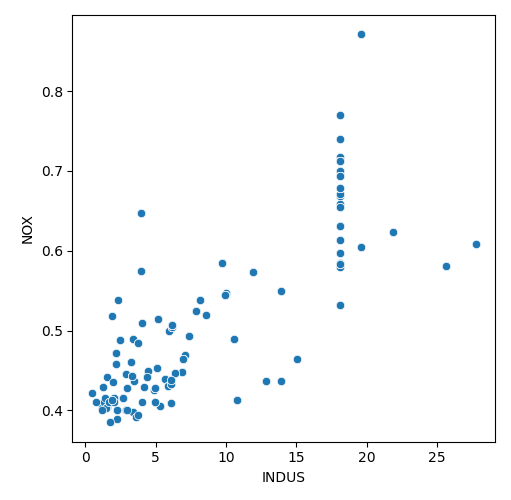

In [16]:
ax=sns.scatterplot(data=boston_df,x='INDUS',y='NOX')
pyplot.show()

In [18]:
#We could see a positive linear corelation between the variables NOX and INDUS

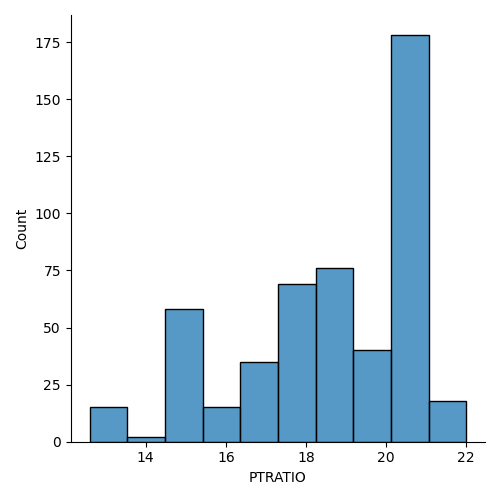

In [25]:
sns.displot(x=boston_df['PTRATIO'], kde=False, bins=10)

pyplot.show()

In [26]:
#PTRATIO is highest as 20-21 range
#So, on average we could say that, for about every 20 pupils, there is 1 teacher to look after them.

In [27]:
#question:Is there a significant difference in median value of houses bounded by the charles river or not?
#null hypothesis= there is no significant difference in median value of houses by the charles river
#alternative hypothesis= there is a significant difference in median value of houses by the charles river
MEDV_CHAS_ttest=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=True)
print(MEDV_CHAS_ttest)
#we reject the null hypothesis as there is significant evidence to prove there is a significant difference in median value of houses by the charles river


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


In [28]:
#question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#null hypothesis: there is no difference in Median values of houses  for each proportion of owner occupied units built prior to 1940
#alternative hypothesis: there is a difference in Median values of houses  for each proportion of owner occupied units built prior to 1940
#answer=we reject the null hypothesis as there are enough evidence that there is a difference in median values of houses for each proportion of owner occupied unites built prior to 1940


In [29]:
MEDV_age_anova_test=scipy.stats.f_oneway(boston_df['MEDV'],boston_df['AGE'])
print(MEDV_age_anova_test)



F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)


In [60]:
#Question:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#alternative hypothesis:there is a  relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#answer=we fail to reject the null hypothesis as there is significant evidence that there is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

In [61]:
INDUS_NOX_pearson=scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])
print(INDUS_NOX_pearson)

(0.7636514469209189, 7.913361061211254e-98)


In [ ]:
#Q4:What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
#Hypothesis

#null hypothesis: There is no correlation between DIS and MEDV attributes
#alternative hypothesis: There exists correlation between DIS and MEDV attributes

In [30]:
X = boston_df["DIS"]
X.head()
y = boston_df["MEDV"]
y.head()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        14:49:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#correlation
corr_value = round(np.sqrt(0.062), 2)
corr_value

0.25

In [32]:
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


In [33]:
#So, correlation value of 0.25 shows that there is weak relation between MEDV and DIS attributes